In [249]:
import pandas as pd

# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 100
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
%matplotlib inline

# ml
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [250]:
def missing_vals(df):
    """prints out columns with perc of missing values"""
    missing = [
        (df.columns[idx], perc)
        for idx, perc in enumerate(df.isna().mean() * 100)
        if perc > 0
    ]

    if len(missing) == 0:
        return "no missing values"
        

    # sort desc by perc
    missing.sort(key=lambda x: x[1], reverse=True)

    print(f"There are a total of {len(missing)} variables with missing values\n")

    for tup in missing:
        print(str.ljust(f"{tup[0]:<20} => {round(tup[1], 3)}%", 1))

In [251]:
train = pd.read_csv("training_set.csv")
labels = pd.read_csv("training_target.csv")


In [252]:
train

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103
...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,NaN,3500.0,1.0,45
431,17.100000,NaN,193.000000,loc_3,3400.0,0.0,398
432,19.400000,NaN,NaN,loc_1,3900.0,1.0,156
433,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,47


In [253]:
labels


,ID,species
0,284,C
1,101,C
2,400,B
3,98,C
4,103,C
...,...,...
430,45,B
431,398,A
432,156,A
433,47,B


In [254]:
train = train.merge(labels, on="ID")

In [255]:
train

,bill_depth,bill_length,wing_length,location,mass,sex,ID,species
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284,C
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101,C
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400,B
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98,C
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103,C
...,...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,NaN,3500.0,1.0,45,B
431,17.100000,NaN,193.000000,loc_3,3400.0,0.0,398,A
432,19.400000,NaN,NaN,loc_1,3900.0,1.0,156,A
433,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,47,B


In [256]:
target_cols = "species"
num_cols = ["bill_depth", "bill_length", "wing_length", "mass"]
cat_cols = ["location", "sex"]
all_cols = num_cols + cat_cols + [target_cols]

train = train[all_cols]

In [257]:
train

,bill_depth,bill_length,wing_length,mass,location,sex,species
0,14.300000,48.200000,210.000000,4600.0,loc_2,0.0,C
1,14.400000,48.400000,203.000000,4625.0,loc_2,0.0,C
2,18.400000,NaN,200.000000,3400.0,loc_3,0.0,B
3,14.982114,47.504878,NaN,4800.0,NaN,0.0,C
4,18.982114,38.259307,217.186992,5200.0,loc_3,0.0,C
...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,3500.0,NaN,1.0,B
431,17.100000,NaN,193.000000,3400.0,loc_3,0.0,A
432,19.400000,NaN,NaN,3900.0,loc_1,1.0,A
433,16.600000,55.512336,187.000000,2900.0,loc_2,NaN,B


In [258]:
test = pd.read_csv("test_set.csv")

In [259]:
test

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.982114,38.259307,217.186992,loc_2,5400.0,0.0,2
1,13.200000,46.100000,211.000000,loc_2,4500.0,0.0,5
2,20.000000,NaN,197.000000,loc_3,3300.0,1.0,7
3,17.500000,38.791391,190.000000,loc_3,3900.0,NaN,8
4,18.900000,NaN,184.000000,loc_2,3550.0,1.0,9
...,...,...,...,...,...,...,...
104,19.000000,NaN,NaN,loc_1,3600.0,0.0,507
105,18.000000,NaN,210.000000,loc_1,4000.0,1.0,512
106,19.500000,49.000000,210.000000,loc_3,3950.0,1.0,516
107,17.900000,50.100000,190.000000,loc_3,3400.0,0.0,533


In [260]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bill_depth   434 non-null    float64
 1   bill_length  295 non-null    float64
 2   wing_length  298 non-null    float64
 3   mass         433 non-null    float64
 4   location     405 non-null    object 
 5   sex          379 non-null    float64
 6   species      435 non-null    object 
dtypes: float64(5), object(2)
memory usage: 27.2+ KB


In [261]:
train.isnull().sum()

bill_depth       1
bill_length    140
wing_length    137
mass             2
location        30
sex             56
species          0
dtype: int64

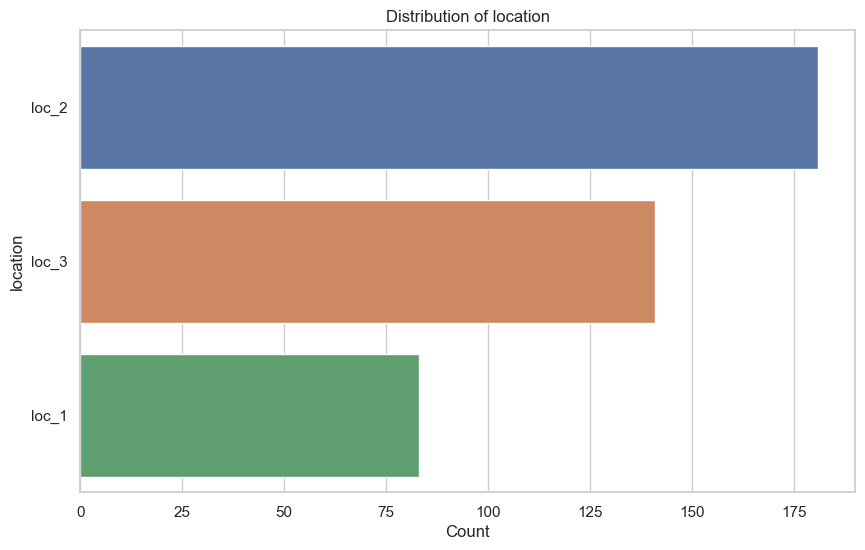

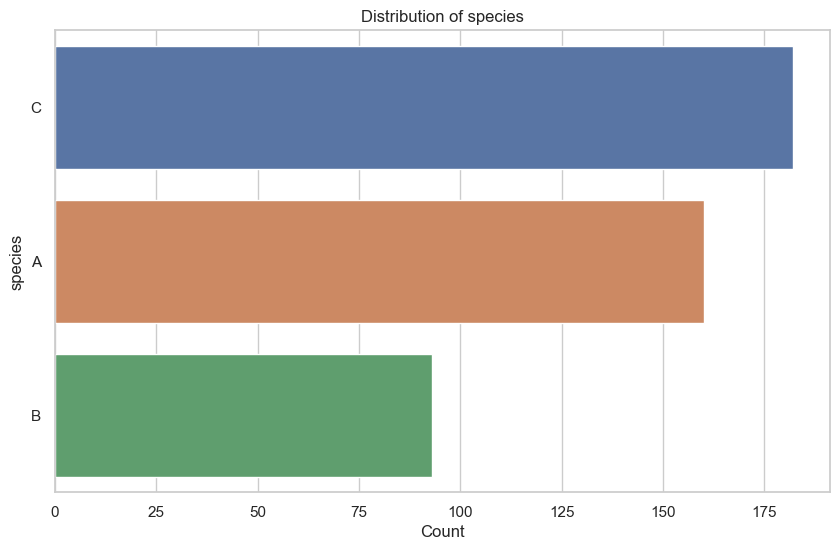

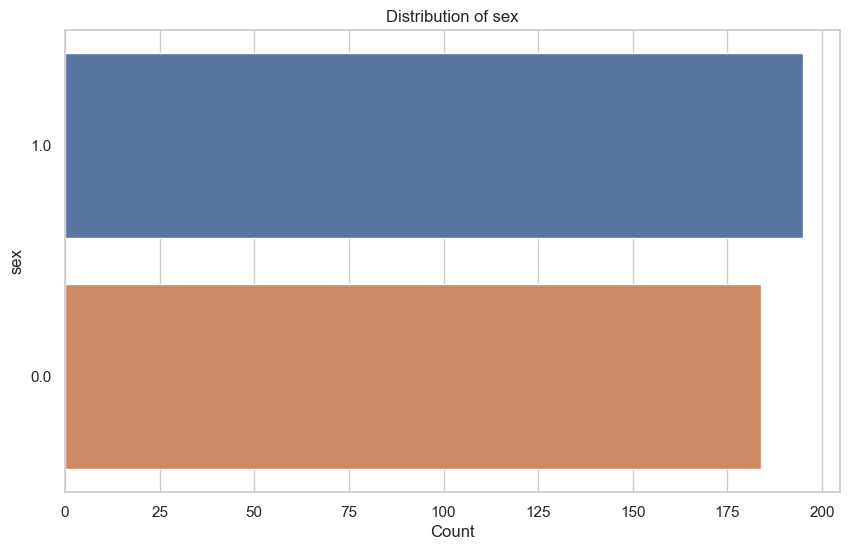

In [262]:
def plot_categorical_distribution(train, column_name):
    
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column_name, data=train, order = train[column_name].value_counts().index)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.show()


# Plotting the distribution of some categorical variables
plot_categorical_distribution(train, 'location')
plot_categorical_distribution(train, 'species')
plot_categorical_distribution(train, 'sex')

In [263]:
target_cols = "species"
num_cols = ["bill_depth", "bill_length", "wing_length", "mass"]
cat_cols = ["location", "sex"]
all_cols = num_cols + cat_cols + [target_cols]

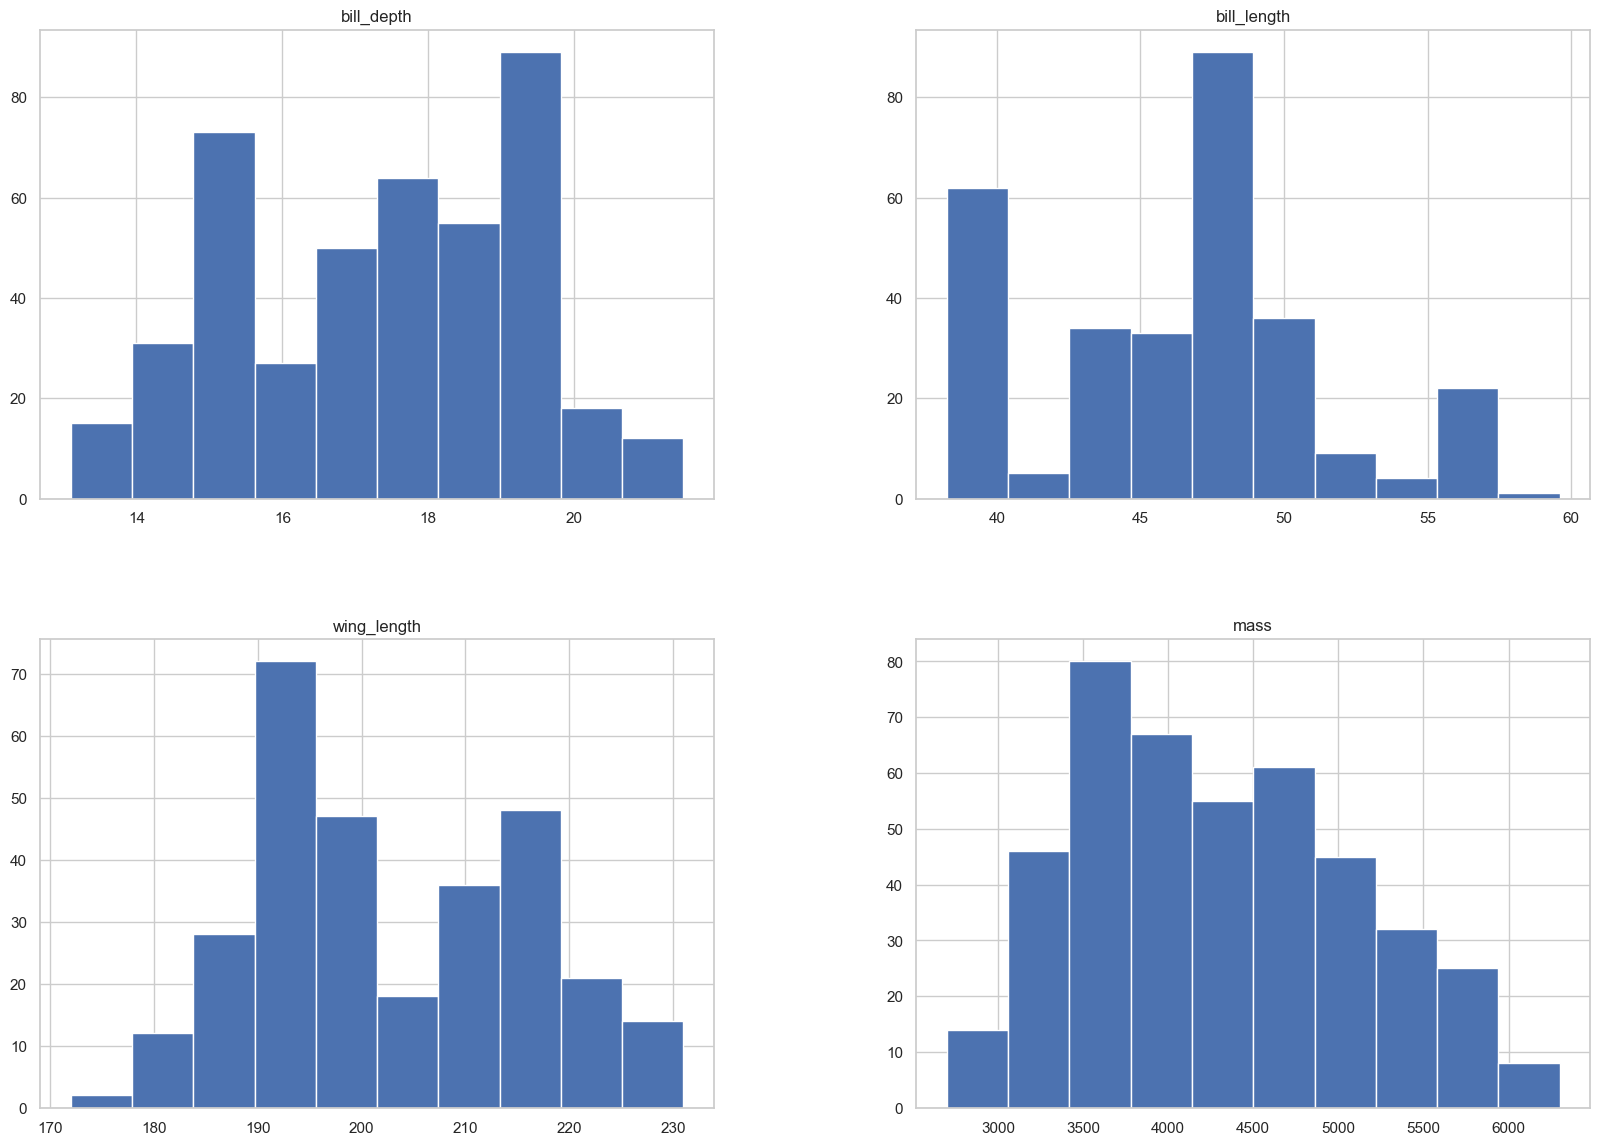

In [264]:
train[num_cols].hist(figsize=(20, 14));

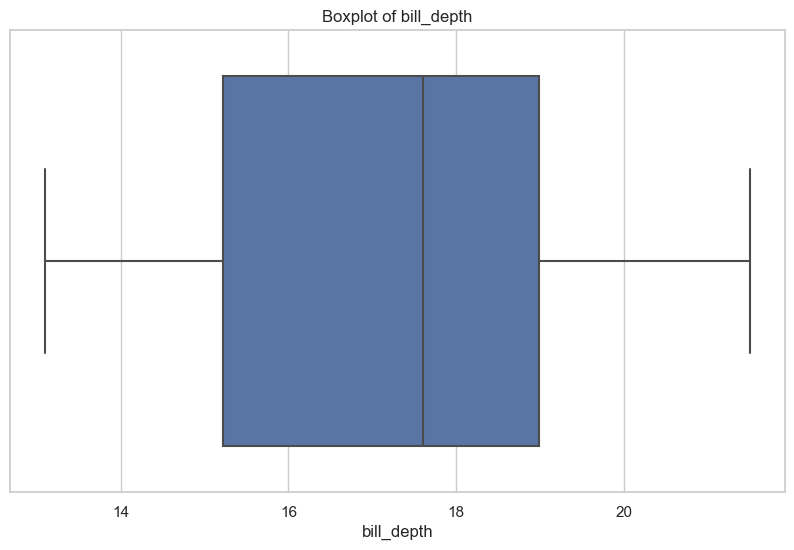

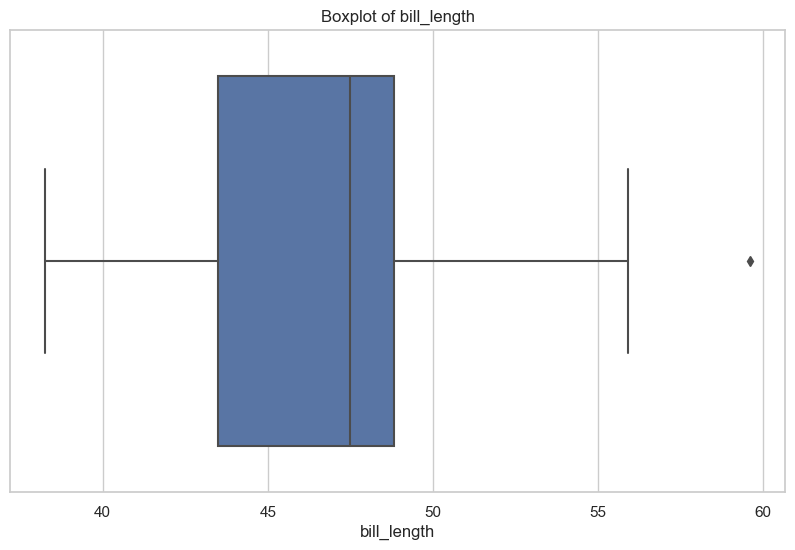

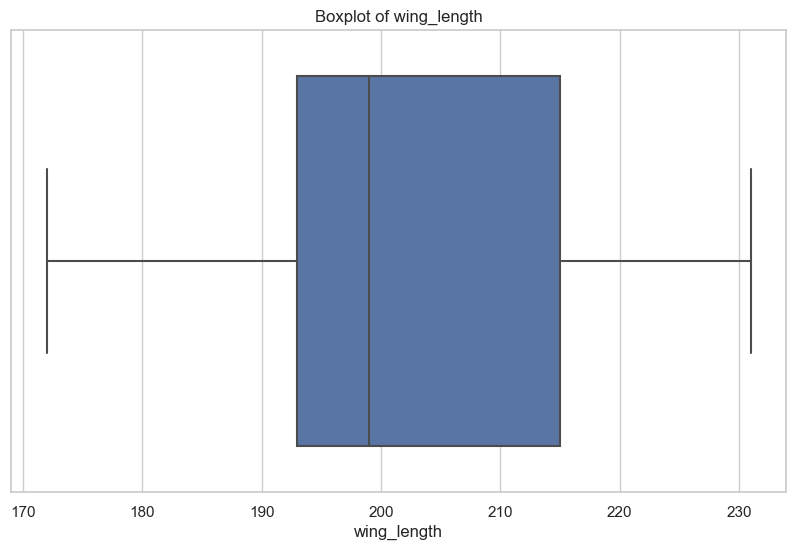

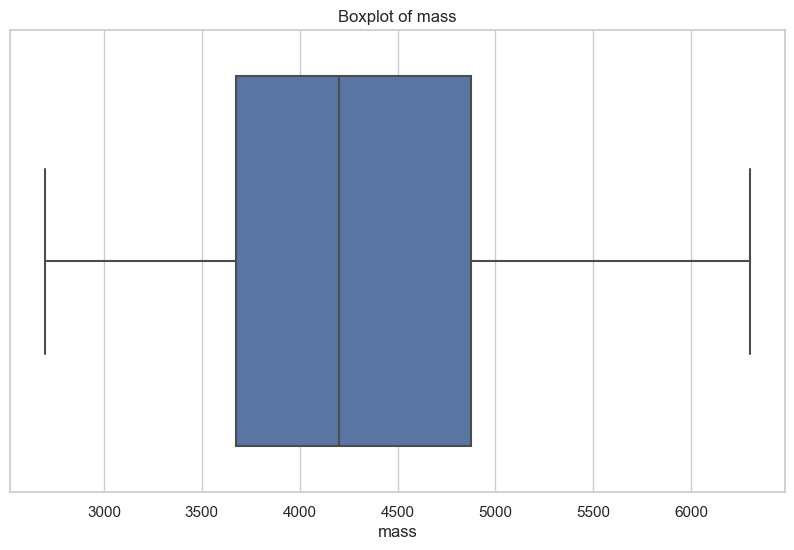

In [265]:
def plot_boxplot(train, column_name):

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(column_name)
    plt.show()

# Plotting boxplots for numerical variables
num_cols = ["bill_depth", "bill_length", "wing_length", "mass"]

for column in num_cols:
    plot_boxplot(train, column)

In [266]:
train.species.value_counts()

C    182
A    160
B     93
Name: species, dtype: int64

In [267]:
missing_vals(train)

There are a total of 6 variables with missing values

bill_length          => 32.184%
wing_length          => 31.494%
sex                  => 12.874%
location             => 6.897%
mass                 => 0.46%
bill_depth           => 0.23%


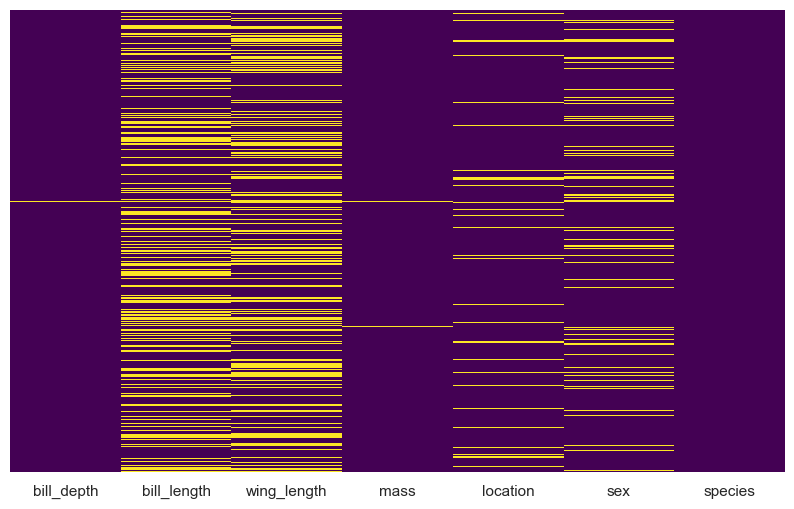

In [268]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis', cbar=False);

In [269]:
cat_imp = SimpleImputer(strategy="most_frequent")

train[cat_cols] = cat_imp.fit_transform(train[cat_cols])

/var/folders/xw/vqr91wdn0z95ys_pkgyjcsdm0000gn/T/ipykernel_15170/696095427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[cat_cols] = cat_imp.fit_transform(train[cat_cols])


In [270]:
num_imp = SimpleImputer(strategy="median")

train[num_cols] = num_imp.fit_transform(train[num_cols])

/var/folders/xw/vqr91wdn0z95ys_pkgyjcsdm0000gn/T/ipykernel_15170/1591640101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[num_cols] = num_imp.fit_transform(train[num_cols])


In [271]:
missing_vals(train)

'no missing values'

In [272]:
le = LabelEncoder()
le.fit(train['species'])
le_name_map = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_map

{'A': 0, 'B': 1, 'C': 2}

In [273]:
train['species'] = le.fit_transform(train['species'])

/var/folders/xw/vqr91wdn0z95ys_pkgyjcsdm0000gn/T/ipykernel_15170/3759069915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['species'] = le.fit_transform(train['species'])


In [274]:
for col in cat_cols:
    if train[col].dtype == "object":
        train[col] = le.fit_transform(train[col])

/var/folders/xw/vqr91wdn0z95ys_pkgyjcsdm0000gn/T/ipykernel_15170/3965734693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])
/var/folders/xw/vqr91wdn0z95ys_pkgyjcsdm0000gn/T/ipykernel_15170/3965734693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])


In [275]:
train.head()

,bill_depth,bill_length,wing_length,mass,location,sex,species
0,14.300000,48.200000,210.000000,4600.0,1,0,2
1,14.400000,48.400000,203.000000,4625.0,1,0,2
2,18.400000,47.500000,200.000000,3400.0,2,0,1
3,14.982114,47.504878,199.000000,4800.0,1,0,2
4,18.982114,38.259307,217.186992,5200.0,2,0,2


In [276]:
# Convert cat_features to pd.Categorical dtype
for col in cat_cols:
    train[col] = pd.Categorical(train[col])

/var/folders/xw/vqr91wdn0z95ys_pkgyjcsdm0000gn/T/ipykernel_15170/2872227401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.Categorical(train[col])


In [277]:
train.dtypes


bill_depth      float64
bill_length     float64
wing_length     float64
mass            float64
location       category
sex            category
species           int64
dtype: object

In [278]:
train['b_depth_length_ratio'] = train['bill_depth'] / train['bill_length']
train['b_length_depth_ratio'] = train['bill_length'] / train['bill_depth']
train['w_length_mass_ratio'] = train['wing_length'] / train['mass']

In [279]:
train.head()


,bill_depth,bill_length,wing_length,mass,location,sex,species,b_depth_length_ratio,b_length_depth_ratio,w_length_mass_ratio
0,14.300000,48.200000,210.000000,4600.0,1,0,2,0.296680,3.370629,0.045652
1,14.400000,48.400000,203.000000,4625.0,1,0,2,0.297521,3.361111,0.043892
2,18.400000,47.500000,200.000000,3400.0,2,0,1,0.387368,2.581522,0.058824
3,14.982114,47.504878,199.000000,4800.0,1,0,2,0.315381,3.170773,0.041458
4,18.982114,38.259307,217.186992,5200.0,2,0,2,0.496144,2.015545,0.041767


In [280]:
missing_vals(train)

'no missing values'

In [281]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separating the features (X) from the target variable (y)
X = train.drop('species', axis=1)  # Features (all columns except 'species')
y = train['species']  # Target variable ('species')

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Showing the distribution of the target variable after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
0    146
1    146
2    146
Name: species, dtype: int64


In [282]:
missing_vals(X_train_smote)

There are a total of 2 variables with missing values

location             => 9.589%
sex                  => 7.763%


In [283]:
from sklearn.impute import SimpleImputer


In [284]:
# Create an imputer object to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='most_frequent')  # You can also use 'median' or 'most_frequent' depending on your data

# Impute missing values after applying SMOTE
X_train_smote_imputed = imputer.fit_transform(X_train_smote)



In [285]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train_smote_imputed, y_train_smote)

In [286]:
dtree_pred = dtree_model.predict(X_test)

/Users/sainithingovind/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [287]:
print(classification_report(dtree_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83        43
           1       0.79      1.00      0.88        15
           2       0.78      0.97      0.86        29

    accuracy                           0.85        87
   macro avg       0.85      0.90      0.86        87
weighted avg       0.87      0.85      0.85        87



In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit Random Forest model after applying SMOTE
rf_model = RandomForestClassifier(random_state=40, max_depth=2)
rf_model.fit(X_train_smote_imputed, y_train_smote)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Print classification report for Random Forest
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       1.00      0.79      0.88        19
           2       0.97      0.92      0.94        36

    accuracy                           0.91        87
   macro avg       0.93      0.89      0.90        87
weighted avg       0.92      0.91      0.91        87



/Users/sainithingovind/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [289]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit Gradient Boosting model after applying SMOTE
gb_model = GradientBoostingClassifier(random_state=40)
gb_model.fit(X_train_smote_imputed, y_train_smote)

# Make predictions
gb_pred = gb_model.predict(X_test)

# Print classification report for Gradient Boosting
print("Gradient Boosting Classification Report:\n")
print(classification_report(y_test, gb_pred))


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.84      0.84      0.84        19
           2       1.00      0.97      0.99        36

    accuracy                           0.92        87
   macro avg       0.91      0.91      0.91        87
weighted avg       0.92      0.92      0.92        87



/Users/sainithingovind/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [290]:
from sklearn.ensemble import BaggingClassifier

# Fit Bagging model after applying SMOTE
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                  n_estimators=50, random_state=40)
bagging_model.fit(X_train_smote_imputed, y_train_smote)

# Make predictions
bagging_pred = bagging_model.predict(X_test)

# Print classification report for Bagging
print("Bagging Classifier Classification Report:\n")
print(classification_report(y_test, bagging_pred))


Bagging Classifier Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.97      0.84        32
           1       1.00      0.79      0.88        19
           2       0.97      0.81      0.88        36

    accuracy                           0.86        87
   macro avg       0.90      0.85      0.87        87
weighted avg       0.89      0.86      0.86        87



/Users/sainithingovind/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/sainithingovind/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [291]:
le = LabelEncoder()

cat_imp = SimpleImputer(strategy="most_frequent")
num_imp = SimpleImputer(strategy="median")

test[cat_cols] = cat_imp.fit_transform(test[cat_cols])
test[num_cols] = num_imp.fit_transform(test[num_cols])

for col in cat_cols:
    if test[col].dtype == "object":
        test[col] = le.fit_transform(test[col])

# Convert cat_features to pd.Categorical dtype
for col in cat_cols:
    test[col] = pd.Categorical(test[col])

# save ID column
test_id = test["ID"]

all_cols.remove('species')
test = test[all_cols]

test['b_depth_length_ratio'] = test['bill_depth'] / test['bill_length']
test['b_length_depth_ratio'] = test['bill_length'] / test['bill_depth']
test['w_length_mass_ratio'] = test['wing_length'] / test['mass']

In [292]:
test

,bill_depth,bill_length,wing_length,mass,location,sex,b_depth_length_ratio,b_length_depth_ratio,w_length_mass_ratio
0,14.982114,38.259307,217.186992,5400.0,1,0,0.391594,2.553665,0.040220
1,13.200000,46.100000,211.000000,4500.0,1,0,0.286334,3.492424,0.046889
2,20.000000,46.750000,197.000000,3300.0,2,1,0.427807,2.337500,0.059697
3,17.500000,38.791391,190.000000,3900.0,2,0,0.451131,2.216651,0.048718
4,18.900000,46.750000,184.000000,3550.0,1,1,0.404278,2.473545,0.051831
...,...,...,...,...,...,...,...,...,...
104,19.000000,46.750000,197.000000,3600.0,0,0,0.406417,2.460526,0.054722
105,18.000000,46.750000,210.000000,4000.0,0,1,0.385027,2.597222,0.052500
106,19.500000,49.000000,210.000000,3950.0,2,1,0.397959,2.512821,0.053165
107,17.900000,50.100000,190.000000,3400.0,2,0,0.357285,2.798883,0.055882


In [301]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(train.drop(columns=['species']), train['species'])
gb_preds = gb_model.predict(test)

submission_df = pd.concat([test_id, pd.DataFrame(gb_preds, columns=['species'])], axis=1)
submission_df.head()

,ID,species
0,2,2
1,5,2
2,7,1
3,8,0
4,9,0


In [302]:
le_name_map

{'A': 0, 'B': 1, 'C': 2}

In [303]:
inv_map = {v: k for k, v in le_name_map.items()}
inv_map

{0: 'A', 1: 'B', 2: 'C'}

In [304]:
submission_df['species'] = submission_df['species'].map(inv_map)  
submission_df.head()

,ID,species
0,2,C
1,5,C
2,7,B
3,8,A
4,9,A


In [305]:
submission_df.to_csv('solution.csv', index=False)


In [306]:
submission_df

,ID,species
0,2,C
1,5,C
2,7,B
3,8,A
4,9,A
...,...,...
104,507,A
105,512,A
106,516,B
107,533,B
